In [42]:
%matplotlib inline

import pandas as pd

In [43]:
# see what raw file looks like

!head -10 data/raw/bjs/state-by-state.csv




Estimated crime in Alabama


1960,   3266740,       6097,         406,         281,         898,       4512,      33823,      11626,      19344,       2853,         186.6,          12.4,           8.6,          27.5,         138.1,       1035.4,         355.9,         592.1,          87.3 
1961,   3302000,       5564,         427,         252,         630,       4255,      32541,      11205,      18801,       2535,         168.5,          12.9,           7.6,          19.1,         128.9,         985.5,         339.3,         569.4,          76.8 
1962,   3358000,       5283,         316,         218,         754,       3995,      35829,      11722,      21306,       2801,         157.3,           9.4,           6.5,          22.5,         119.0,       1067.0,         349.1,         634.5,          83.4 
1963,   3347000,       6115,         340,         192,         828,       4755,      38521,      12614,      22874,       3033,         182.7,          10.2,           5.7,         

In [44]:
# clean up data and store as list of lists

STATE_ROW_START = 'Estimated crime in '
COL_ROW_START = 'Year,Population,'

state, data, cols = None, [], []

with open('data/raw/bjs/state-by-state.csv') as f:
    for row in f:
        # get "active" state
        if row.startswith(STATE_ROW_START):
            state = row.split(STATE_ROW_START)[1].strip()
            print('{}...'.format(state))

        # get list of data columns (& add state as first col)
        if not cols and row.startswith(COL_ROW_START):
            cols = ['state'] + row.lower().split(',')[:-1]

        # skip non-data rows
        try:
            year = int(row.split(',')[0])
        except:
            continue

        # split on commas, parse numbers as floats
        datum = [float(n.strip()) for n in row.split(',')]

        # change year to an int
        datum[0] = int(datum[0])

        # add current state
        datum = [state] + datum
        data.append(datum)

print('{} total rows'.format(len(data)))

Alabama...
Alaska...
Arizona...
Arkansas...
California...
Colorado...
Connecticut...
Delaware...
District of Columbia...
Florida...
Georgia...
Hawaii...
Idaho...
Illinois...
Indiana...
Iowa...
Kansas...
Kentucky...
Louisiana...
Maine...
Maryland...
Massachusetts...
Michigan...
Minnesota...
Mississippi...
Missouri...
Montana...
Nebraska...
Nevada...
New Hampshire...
New Jersey...
New Mexico...
New York...
North Carolina...
North Dakota...
Ohio...
Oklahoma...
Oregon...
Pennsylvania...
Rhode Island...
South Carolina...
South Dakota...
Tennessee...
Texas...
Utah...
Vermont...
Virginia...
Washington...
West Virginia...
Wisconsin...
Wyoming...
United States-Total...
2751 total rows


In [45]:
# convert data to pandas dataframe

df = pd.DataFrame(data, columns=cols)

In [46]:
df.head()

,state,year,population,violent crime total,murder and nonnegligent manslaughter,forcible rape,robbery,aggravated assault,property crime total,burglary,...,motor vehicle theft,violent crime rate,murder and nonnegligent manslaughter rate,forcible rape rate,robbery rate,aggravated assault rate,property crime rate,burglary rate,larceny-theft rate,motor vehicle theft rate
0,Alabama,1960,3266740.0,6097.0,406.0,281.0,898.0,4512.0,33823.0,11626.0,...,2853.0,186.6,12.4,8.6,27.5,138.1,1035.4,355.9,592.1,87.3
1,Alabama,1961,3302000.0,5564.0,427.0,252.0,630.0,4255.0,32541.0,11205.0,...,2535.0,168.5,12.9,7.6,19.1,128.9,985.5,339.3,569.4,76.8
2,Alabama,1962,3358000.0,5283.0,316.0,218.0,754.0,3995.0,35829.0,11722.0,...,2801.0,157.3,9.4,6.5,22.5,119.0,1067.0,349.1,634.5,83.4
3,Alabama,1963,3347000.0,6115.0,340.0,192.0,828.0,4755.0,38521.0,12614.0,...,3033.0,182.7,10.2,5.7,24.7,142.1,1150.9,376.9,683.4,90.6
4,Alabama,1964,3407000.0,7260.0,316.0,397.0,992.0,5555.0,46290.0,15898.0,...,3679.0,213.1,9.3,11.7,29.1,163.0,1358.7,466.6,784.1,108.0


In [47]:
df.tail()

,state,year,population,violent crime total,murder and nonnegligent manslaughter,forcible rape,robbery,aggravated assault,property crime total,burglary,...,motor vehicle theft,violent crime rate,murder and nonnegligent manslaughter rate,forcible rape rate,robbery rate,aggravated assault rate,property crime rate,burglary rate,larceny-theft rate,motor vehicle theft rate
2746,United States-Total,2008,304059724.0,1394461.0,16465.0,90750.0,443563.0,843683.0,9774152.0,2228887.0,...,959059.0,458.6,5.4,29.8,145.9,277.5,3214.6,733.0,2166.1,315.4
2747,United States-Total,2009,307006550.0,1325896.0,15399.0,89241.0,408742.0,812514.0,9337060.0,2203313.0,...,795652.0,431.9,5.0,29.1,133.1,264.7,3041.3,717.7,2064.5,259.2
2748,United States-Total,2010,309330219.0,1251248.0,14722.0,85593.0,369089.0,781844.0,9112625.0,2168459.0,...,739565.0,404.5,4.8,27.7,119.3,252.8,2945.9,701.0,2005.8,239.1
2749,United States-Total,2011,311587816.0,1206031.0,14661.0,84175.0,354772.0,752423.0,9052743.0,2185140.0,...,716508.0,387.1,4.7,27.0,113.9,241.5,2905.4,701.3,1974.1,230.0
2750,United States-Total,2012,313914040.0,1214464.0,14827.0,84376.0,354522.0,760739.0,8975438.0,2103787.0,...,721053.0,386.9,4.7,26.9,112.9,242.3,2859.2,670.2,1959.3,229.7


In [48]:
# filter example

df[(df.state == 'Virginia') & (df.year == 2000)]

,state,year,population,violent crime total,murder and nonnegligent manslaughter,forcible rape,robbery,aggravated assault,property crime total,burglary,...,motor vehicle theft,violent crime rate,murder and nonnegligent manslaughter rate,forcible rape rate,robbery rate,aggravated assault rate,property crime rate,burglary rate,larceny-theft rate,motor vehicle theft rate
2473,Virginia,2000,7078515.0,19943.0,401.0,1616.0,6295.0,11631.0,194405.0,30434.0,...,17813.0,281.7,5.7,22.8,88.9,164.3,2746.4,429.9,2064.8,251.6


In [49]:
# metric totals (subset) across all years by state

# filter out 'United States-Total' rows
dg = df.copy()
dg = dg[dg.state != 'United States-Total']

# group by state and sum up selected fields
fields = ['violent crime total', 'robbery']
totals = dg.groupby('state')[fields].sum()

totals

,violent crime total,robbery
state,,
Alabama,944133.0,232453.0
Alaska,141420.0,22588.0
Arizona,976709.0,265093.0
Arkansas,489552.0,99545.0
California,9517999.0,3524855.0
Colorado,686766.0,175199.0
Connecticut,516130.0,217300.0
Delaware,179880.0,51607.0
District of Columbia,557758.0,303825.0


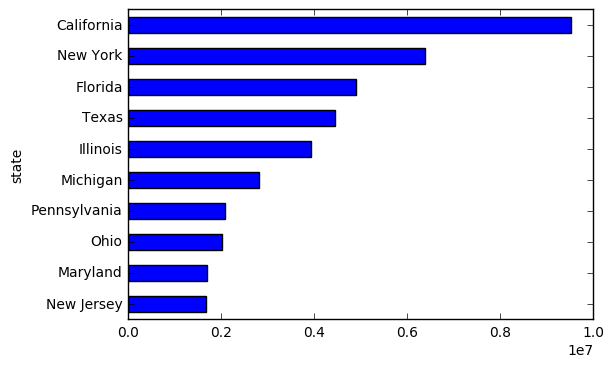

In [53]:
# plot top 10 states with violent crime over history
# note: not population adjusted

totals['violent crime total'].sort_values().tail(10).plot(kind='barh')

In [54]:
# output cleaned, combined data to csv

df.to_csv('data/cleaned/crime-by-state-and-year.csv', index=False)